# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [19]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

In [20]:
A_zad1, b_zad1 = main.diag_dominant_matrix_A_b(10)
test_zad1 = main.is_diag_dominant(A_zad1)

print("Utworzona macierz:\n{}\n\noraz wektor:\n{}\n".format(A_zad1, b_zad1))
print("Czy utworzona macierz jest diagonalnie zdominowana? -> {}".format(test_zad1))

Utworzona macierz:
[[ 46   1   8   7   6   2   4   4   0   3]
 [  4  81   5   8   8   9   0   3   6   0]
 [  3   7 127   6   3   7   5   7   3   4]
 [  6   0   6 181   4   9   7   6   6   4]
 [  0   1   5   8 218   9   1   9   6   7]
 [  6   8   1   6   0 268   4   6   1   3]
 [  9   2   7   2   3   1 302   6   4   9]
 [  5   0   2   1   6   6   6 348   9   2]
 [  3   7   6   9   2   8   5   4 387   0]
 [  9   9   6   7   3   1   2   1   4 419]]

oraz wektor:
[6 8 3 8 1 4 5 1 3 8]

Czy utworzona macierz jest diagonalnie zdominowana? -> True


***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

In [21]:
A_zad2, b_zad2 = main.symmetric_matrix_A_b(10)
test_zad2 = main.is_symmetric(A_zad2)

print("Utworzona macierz:\n{}\n\noraz wektor:\n{}\n".format(A_zad2, b_zad2))
print("Czy utworzona macierz jest symetryczna? -> {}".format(test_zad2))

Utworzona macierz:
[[7 9 6 3 9 0 6 3 4 0]
 [9 7 5 9 9 8 8 1 0 5]
 [6 5 1 8 4 1 5 8 9 6]
 [3 9 8 9 2 3 0 8 7 4]
 [9 9 4 2 5 7 0 8 2 5]
 [0 8 1 3 7 6 5 3 2 0]
 [6 8 5 0 0 5 7 5 0 7]
 [3 1 8 8 8 3 5 1 0 3]
 [4 0 9 7 2 2 0 0 8 9]
 [0 5 6 4 5 0 7 3 9 0]]

oraz wektor:
[0 1 1 4 9 2 3 9 5 0]

Czy utworzona macierz jest symetryczna? -> True


***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [22]:
A1, b1 = main.random_matrix_Ab(10)
print("a) Utworzona macierz:\n{}\n\noraz wektor:\n{}\n".format(A1, b1))
test_A1d = main.is_diag_dominant(A1)
print("Czy utworzona macierz jest diagonalnie zdominowana? -> {}".format(test_A1d))
test_A1s = main.is_symmetric(A1)
print("Czy utworzona macierz jest symetryczna? -> {}".format(test_A1s))

A2, b2 = main.diag_dominant_matrix_A_b(10)
print("\nb) Utworzona macierz diagonalnie zdominowana:\n{}\n\noraz wektor:\n{}\n".format(A2, b2))
test_A2d = main.is_diag_dominant(A2)
print("Czy utworzona macierz jest diagonalnie zdominowana? -> {}".format(test_A2d))
test_A2s = main.is_symmetric(A2)
print("Czy utworzona macierz jest symetryczna? -> {}".format(test_A2s))

A3, b3 = main.symmetric_matrix_A_b(10)
print("\nc) Utworzona macierz symetryczna:\n{}\n\noraz wektor:\n{}\n".format(A3, b3))
test_A3d = main.is_diag_dominant(A3)
print("Czy utworzona macierz jest diagonalnie zdominowana? -> {}".format(test_A3d))
test_A3s = main.is_symmetric(A3)
print("Czy utworzona macierz jest symetryczna? -> {}".format(test_A3s))

a) Utworzona macierz:
[[6 4 2 1 3 2 8 0 6 9]
 [9 6 5 0 7 9 1 9 2 7]
 [5 1 6 9 6 6 7 0 8 6]
 [2 6 8 5 8 8 5 7 0 5]
 [2 9 1 3 0 4 3 5 6 1]
 [8 9 2 2 7 3 5 4 3 5]
 [7 6 6 4 2 1 2 5 0 3]
 [8 6 9 8 7 0 0 5 5 3]
 [6 8 6 4 2 3 4 2 8 8]
 [3 8 4 9 0 6 1 7 9 3]]

oraz wektor:
[6 1 9 5 1 2 7 1 1 3]

Czy utworzona macierz jest diagonalnie zdominowana? -> False
Czy utworzona macierz jest symetryczna? -> False

b) Utworzona macierz diagonalnie zdominowana:
[[ 48   6   4   6   8   5   5   4   1   1]
 [  6  91   4   3   5   3   6   6   7   0]
 [  6   3 139   6   8   1   9   2   2   1]
 [  2   5   3 181   3   4   2   4   3   9]
 [  8   3   7   6 224   1   2   1   7   9]
 [  5   7   2   2   8 257   7   9   8   3]
 [  4   5   5   8   3   9 308   9   4   5]
 [  8   7   9   4   3   0   5 355   7   2]
 [  6   7   8   2   5   1   8   7 395   5]
 [  2   0   6   5   0   9   7   5   1 430]]

oraz wektor:
[1 1 9 8 7 6 8 8 7 5]

Czy utworzona macierz jest diagonalnie zdominowana? -> True
Czy utworzona macierz jes

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

Rozwiązanie:
Zaimplementowano w pliku main.py

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Utworzona macierz z podpunktu a):
[[6 4 2 1 3 2 8 0 6 9]
 [9 6 5 0 7 9 1 9 2 7]
 [5 1 6 9 6 6 7 0 8 6]
 [2 6 8 5 8 8 5 7 0 5]
 [2 9 1 3 0 4 3 5 6 1]
 [8 9 2 2 7 3 5 4 3 5]
 [7 6 6 4 2 1 2 5 0 3]
 [8 6 9 8 7 0 0 5 5 3]
 [6 8 6 4 2 3 4 2 8 8]
 [3 8 4 9 0 6 1 7 9 3]]

oraz wektor:
[6 1 9 5 1 2 7 1 1 3]

Czy utworzona macierz jest diagonalnie zdominowana? -> False
Czy utworzona macierz jest symetryczna? -> False

Rozwiązanie równania z zastosowaniem metody linalg.solve:
[ 0.67151027 -0.6579347   0.02380054  0.70407923 -0.78472689  0.07292379
  1.37824555  0.51220562 -0.56123589 -0.177691  ]

Czas wykonania: 
47.5 µs ± 26.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Pamięć: 
peak memory: 145.76 MiB, increment: 0.01 MiB

Rozwiązanie równania z zastosowaniem metody main.solve_jacobi:
(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), [inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

D:\Metody numeryczne lab\laboratorium-8-m-wieloch\main.py:167: RuntimeWarning: divide by zero encountered in true_divide
  D_inv = np.diag(1 / np.diag(D))


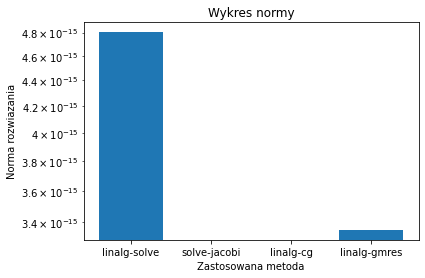

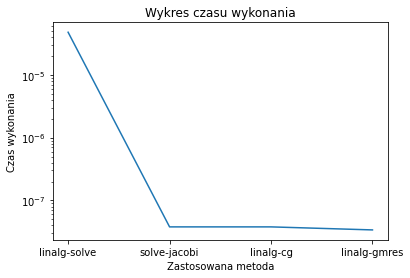

In [26]:
print("Utworzona macierz z podpunktu a):\n{}\n\noraz wektor:\n{}\n".format(A1, b1))
print("Czy utworzona macierz jest diagonalnie zdominowana? -> {}".format(test_A1d))
print("Czy utworzona macierz jest symetryczna? -> {}\n".format(test_A1s))

solution_a1 = sp.linalg.solve(A1, b1)
norm_a1 = main.residual_norm(A1, solution_a1, b1)
print("Rozwiązanie równania z zastosowaniem metody linalg.solve:\n{}\n".format(solution_a1))
print("Czas wykonania: ")
ta1 = %timeit -r 5 -n 10 -o sp.linalg.solve(A1, b1)
print("\nPamięć: ")
%memit sp.linalg.solve(A1, b1)

solution_a2 = main.solve_jacobi(A1, b1, solution_a1)
norm_a2 = main.residual_norm(A1, solution_a2[0], b1)
print("\nRozwiązanie równania z zastosowaniem metody main.solve_jacobi:\n{}\n".format(solution_a2))
print("Czas wykonania: ")
ta2 = %timeit -r 5 -n 10 -o solution_a2
print("\nPamięć: ")
%memit main.solve_jacobi(A1, b1, solution_a1)

solution_a3 = sp.sparse.linalg.cg(A1, b1)
norm_a3 = main.residual_norm(A1, solution_a3[0], b1)
print("\nRozwiązanie równania z zastosowaniem metody sp.sparse.linalg.cg:\n{}\n".format(solution_a3))
print("Czas wykonania: ")
ta3 = %timeit -r 5 -n 10 -o solution_a3
print("\nPamięć: ")
%memit sp.sparse.linalg.cg(A1, b1)

solution_a4 = sp.sparse.linalg.gmres(A1, b1)
norm_a4 = main.residual_norm(A1, solution_a4[0], b1)
print("\nRozwiązanie równania z zastosowaniem metody sp.sparse.linalg.gmres:\n{}\n".format(solution_a4))
print("Czas wykonania: ")
ta4 = %timeit -r 5 -n 10 -o solution_a4
print("\nPamięć: ")
%memit sp.sparse.linalg.gmres(A1, b1)

xa = ["linalg-solve", "solve-jacobi", "linalg-cg", "linalg-gmres"]
norm_a = [norm_a1, norm_a2, norm_a3, norm_a4]

plt.figure()
plt.bar(xa, norm_a)
plt.title("Wykres normy")
plt.xlabel("Zastosowana metoda")
plt.ylabel("Norma rozwiazania")
plt.yscale('log')
plt.show()

ta = [ta1.average, ta2.average, ta3.average, ta4.average]

plt.figure()
plt.plot(xa, ta)
plt.title("Wykres czasu wykonania")
plt.xlabel("Zastosowana metoda")
plt.ylabel("Czas wykonania")
plt.yscale('log')
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Utworzona macierz z podpunktu b):
[[ 48   6   4   6   8   5   5   4   1   1]
 [  6  91   4   3   5   3   6   6   7   0]
 [  6   3 139   6   8   1   9   2   2   1]
 [  2   5   3 181   3   4   2   4   3   9]
 [  8   3   7   6 224   1   2   1   7   9]
 [  5   7   2   2   8 257   7   9   8   3]
 [  4   5   5   8   3   9 308   9   4   5]
 [  8   7   9   4   3   0   5 355   7   2]
 [  6   7   8   2   5   1   8   7 395   5]
 [  2   0   6   5   0   9   7   5   1 430]]

oraz wektor:
[1 1 9 8 7 6 8 8 7 5]

Czy utworzona macierz jest diagonalnie zdominowana? -> True
Czy utworzona macierz jest symetryczna? -> False

Rozwiązanie równania z zastosowaniem metody linalg.solve:
[-0.00038168  0.00100535  0.05927393  0.04091557  0.02708586  0.01983556
  0.02217396  0.01967108  0.01499352  0.00928711]

Czas wykonania: 
The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
34.7 µs ± 27.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


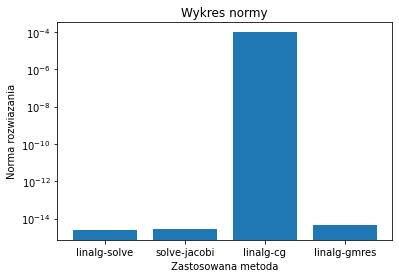

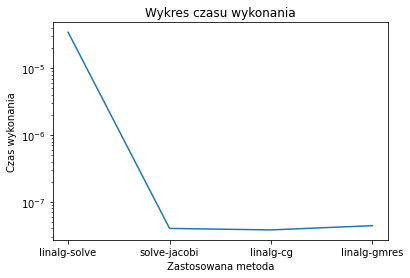

In [24]:
print("Utworzona macierz z podpunktu b):\n{}\n\noraz wektor:\n{}\n".format(A2, b2))
print("Czy utworzona macierz jest diagonalnie zdominowana? -> {}".format(test_A2d))
print("Czy utworzona macierz jest symetryczna? -> {}\n".format(test_A2s))

solution_b1 = sp.linalg.solve(A2, b2)
norm_b1 = main.residual_norm(A2, solution_b1, b2)
print("Rozwiązanie równania z zastosowaniem metody linalg.solve:\n{}\n".format(solution_b1))
print("Czas wykonania: ")
tb1 = %timeit -r 5 -n 10 -o sp.linalg.solve(A2, b2)
print("\nPamięć: ")
%memit sp.linalg.solve(A2, b2)

solution_b2 = main.solve_jacobi(A2, b2, solution_b1)
norm_b2 = main.residual_norm(A2, solution_b2[0], b2)
print("\nRozwiązanie równania z zastosowaniem metody main.solve_jacobi:\n{}\n".format(solution_b2))
print("Czas wykonania: ")
tb2 = %timeit -r 5 -n 10 -o solution_b2
print("\nPamięć: ")
%memit main.solve_jacobi(A2, b2, solution_b1)

solution_b3 = sp.sparse.linalg.cg(A2, b2)
norm_b3 = main.residual_norm(A2, solution_b3[0], b2)
print("\nRozwiązanie równania z zastosowaniem metody sp.sparse.linalg.cg:\n{}\n".format(solution_b3))
print("Czas wykonania: ")
tb3 = %timeit -r 5 -n 10 -o solution_b3
print("\nPamięć: ")
%memit sp.sparse.linalg.cg(A2, b2)

solution_b4 = sp.sparse.linalg.gmres(A2, b2)
norm_b4 = main.residual_norm(A2, solution_b4[0], b2)
print("\nRozwiązanie równania z zastosowaniem metody sp.sparse.linalg.gmres:\n{}\n".format(solution_b4))
print("Czas wykonania: ")
tb4 = %timeit -r 5 -n 10 -o solution_b4
print("\nPamięć: ")
%memit sp.sparse.linalg.gmres(A2, b2)

xb = ["linalg-solve", "solve-jacobi", "linalg-cg", "linalg-gmres"]
norm_b = [norm_b1, norm_b2, norm_b3, norm_b4]

plt.figure()
plt.bar(xb, norm_b)
plt.title("Wykres normy")
plt.xlabel("Zastosowana metoda")
plt.ylabel("Norma rozwiazania")
plt.yscale('log')
plt.show()

tb = [tb1.average, tb2.average, tb3.average, tb4.average]

plt.figure()
plt.plot(xb, tb)
plt.title("Wykres czasu wykonania")
plt.xlabel("Zastosowana metoda")
plt.ylabel("Czas wykonania")
plt.yscale('log')
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Utworzona macierz z podpunktu c):
[[1 0 2 4 9 6 2 4 4 7]
 [0 6 6 1 0 6 2 7 7 5]
 [2 6 5 0 9 6 4 8 0 7]
 [4 1 0 7 1 7 1 9 9 5]
 [9 0 9 1 4 8 9 7 4 1]
 [6 6 6 7 8 6 6 2 8 7]
 [2 2 4 1 9 6 9 6 6 6]
 [4 7 8 9 7 2 6 7 8 4]
 [4 7 0 9 4 8 6 8 6 6]
 [7 5 7 5 1 7 6 4 6 1]]

oraz wektor:
[9 8 0 4 0 0 6 4 6 2]

Czy utworzona macierz jest diagonalnie zdominowana? -> False
Czy utworzona macierz jest symetryczna? -> True

Rozwiązanie równania z zastosowaniem metody linalg.solve:
[-2.75494135 -0.90958492  0.99508456  1.45255863 -0.30814465  1.51864415
  0.64264714 -0.11619681 -0.30423117 -0.28394396]

Czas wykonania: 
The slowest run took 5.25 times longer than the fastest. This could mean that an intermediate result is being cached.
38.2 µs ± 34.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Pamięć: 
peak memory: 145.82 MiB, increment: 0.02 MiB

Rozwiązanie równania z zastosowaniem metody main.solve_jacobi:
(array([-2.75494135, -0.90958492,  0.99508456,  1.45255863, -0.30814465,
        

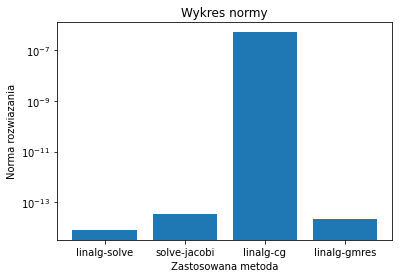

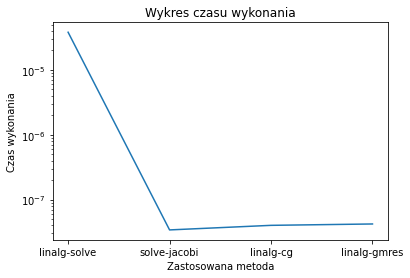

In [25]:
print("Utworzona macierz z podpunktu c):\n{}\n\noraz wektor:\n{}\n".format(A3, b3))
print("Czy utworzona macierz jest diagonalnie zdominowana? -> {}".format(test_A3d))
print("Czy utworzona macierz jest symetryczna? -> {}\n".format(test_A3s))

solution_c1 = sp.linalg.solve(A3, b3)
norm_c1 = main.residual_norm(A3, solution_c1, b3)
print("Rozwiązanie równania z zastosowaniem metody linalg.solve:\n{}\n".format(solution_c1))
print("Czas wykonania: ")
tc1 = %timeit -r 5 -n 10 -o sp.linalg.solve(A3, b3)
print("\nPamięć: ")
%memit sp.linalg.solve(A3, b3)

solution_c2 = main.solve_jacobi(A3, b3, solution_c1)
norm_c2 = main.residual_norm(A3, solution_c2[0], b3)
print("\nRozwiązanie równania z zastosowaniem metody main.solve_jacobi:\n{}\n".format(solution_c2))
print("Czas wykonania: ")
tc2 = %timeit -r 5 -n 10 -o solution_c2
print("\nPamięć: ")
%memit main.solve_jacobi(A3, b3, solution_c1)

solution_c3 = sp.sparse.linalg.cg(A3, b3)
norm_c3 = main.residual_norm(A3, solution_c3[0], b3)
print("\nRozwiązanie równania z zastosowaniem metody sp.sparse.linalg.cg:\n{}\n".format(solution_c3))
print("Czas wykonania: ")
tc3 = %timeit -r 5 -n 10 -o solution_c3
print("\nPamięć: ")
%memit sp.sparse.linalg.cg(A3, b3)

solution_c4 = sp.sparse.linalg.gmres(A3, b3)
norm_c4 = main.residual_norm(A3, solution_c4[0], b3)
print("\nRozwiązanie równania z zastosowaniem metody sp.sparse.linalg.gmres:\n{}\n".format(solution_c4))
print("Czas wykonania: ")
tc4 = %timeit -r 5 -n 10 -o solution_c4
print("\nPamięć: ")
%memit sp.sparse.linalg.gmres(A3, b3)

xc = ["linalg-solve", "solve-jacobi", "linalg-cg", "linalg-gmres"]
norm_c = [norm_c1, norm_c2, norm_c3, norm_c4]

plt.figure()
plt.bar(xc, norm_c)
plt.title("Wykres normy")
plt.xlabel("Zastosowana metoda")
plt.ylabel("Norma rozwiazania")
plt.yscale('log')
plt.show()

tc = [tc1.average, tc2.average, tc3.average, tc4.average]

plt.figure()
plt.plot(xc, tc)
plt.title("Wykres czasu wykonania")
plt.xlabel("Zastosowana metoda")
plt.ylabel("Czas wykonania")
plt.yscale('log')
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)